# 逻辑回归 Logistic Regression
解决分类问题

原理：
将样本的特征和样本发生的概率联系在一起

逻辑回归既可以看做是回归算法，也可以看做是分类算法。
首先计算概率，如果概率>0.5 是，<0.5不是。
通常作为分类算法使用，只可以解决二分类问题。

## Sigmoid函数
p(t) = 1/(1 + e^(-t)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1/(1 + np.exp(-t))

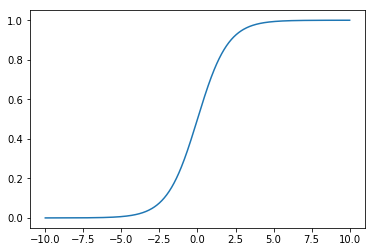

In [3]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

值域：(0, 1)

t > 0, p > 0.5

t < 0, p < 0.5

这现在逻辑回归的问题是：
对于给定的样本数据集X， y，我们如何找到参数theta，使得使用这种方式可以最大程度获得样本数据集X对应的分类输出y

## 损失函数

cost = 

-log(p) if y = 1

-log(1-p) if y = 0

则：
cost = -ylog(p) - (1 - y)log(1 - p)

## scikit-learn的逻辑回归
### 数据集准备

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 莺尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# 莺尾花数据集中有3种分类，但是逻辑回归只能分类2种数据集
# 这里将莺尾花数据从3种数据变为2种数据分类
X = X[y<2, :2]
y = y[y<2]

In [6]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

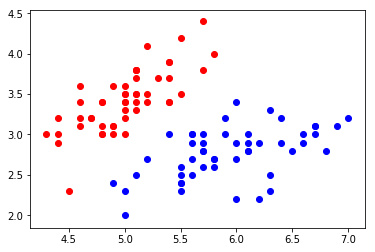

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 数据集2

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

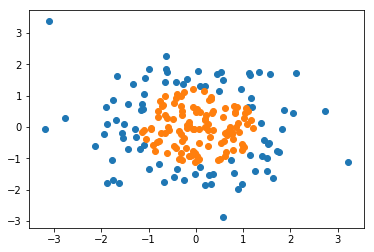

In [12]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 数据集3

In [13]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1] < 1.5, dtype='int')
# 给数据集添加噪音， 随机强制20个点等于1
for _ in range(20):
    y[np.random.randint(200)] = 1

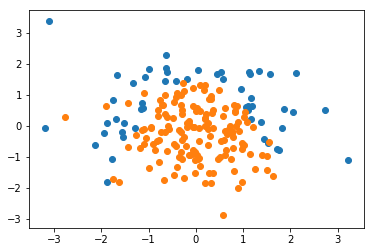

In [14]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 使用scikit-learn中的逻辑回归

In [16]:
from sklearn.linear_model import LogisticRegression

# penalty: 正则项，默认使用L2
# C: 超参数，默认1.0，即不进行正则化
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [18]:
log_reg.score(X_test, y_test)

0.86

In [19]:
def plot_decision_boundary(model, axis):
    """对分类结果进行绘图"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


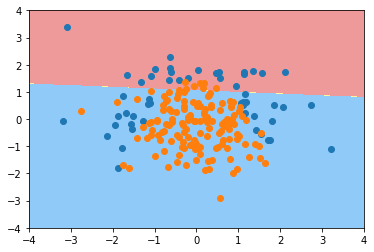

In [20]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

**使用多项式项进行逻辑回归**

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomailLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver='liblinear')),
    ])

In [22]:
poly_log_reg = PolynomailLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [23]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [24]:
poly_log_reg.score(X_test, y_test)

0.94

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


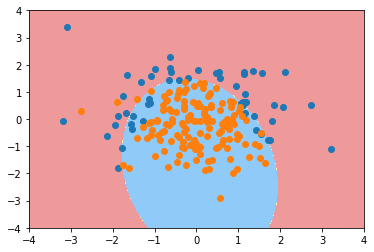

In [25]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [26]:
poly_log_reg = PolynomailLogisticRegression(degree=20)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


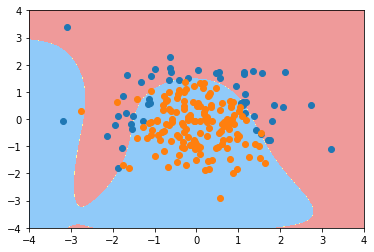

In [27]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

**使用模型的正则化**

In [32]:
def PolynorialLogisticRegression2(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, solver='liblinear')),
    ])

In [33]:
poly_log_reg = PolynorialLogisticRegression2(degree=20, C=0.1)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [34]:
poly_log_reg.score(X_train, y_train)

0.8533333333333334

In [35]:
poly_log_reg.score(X_test, y_test)

0.92

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


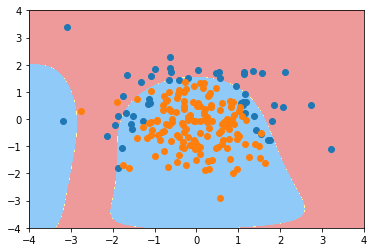

In [36]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [44]:
def PolynorialLogisticRegression3(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, solver='liblinear')),
    ])

In [45]:
poly_log_reg = PolynorialLogisticRegression3(degree=20, C=0.1, penalty='l1')
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [46]:
poly_log_reg.score(X_train, y_train)

0.8266666666666667

In [47]:
poly_log_reg.score(X_test, y_test)

0.9

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


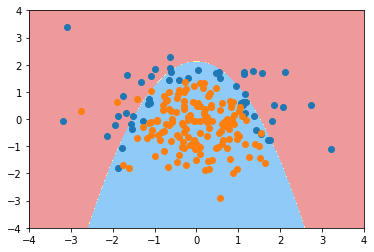

In [48]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 使逻辑回归支持多分类问题
通用的使二分类解决多分类的方法：
* OvR（One vs Rest）
* OvO（one vs One） 

In [49]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [51]:
from sklearn.linear_model import LogisticRegression

In [56]:
# multi_class: 多种类回归
log_reg = LogisticRegression(solver='liblinear', multi_class='ovr')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
log_reg.score(X_test, y_test)

0.6578947368421053

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


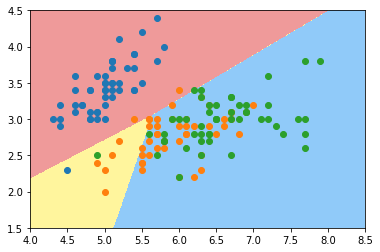

In [60]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [62]:
log_reg_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [65]:
log_reg_ovo.fit(X_train, y_train)
log_reg_ovo.score(X_test, y_test)

0.7894736842105263

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


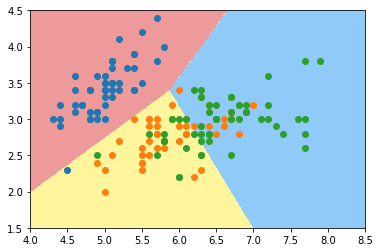

In [67]:
plot_decision_boundary(log_reg_ovo, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

**使用所有的数据**

In [68]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [69]:
log_reg = LogisticRegression(solver='liblinear', multi_class='ovr')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
log_reg.score(X_test, y_test)

0.9736842105263158

In [72]:
log_reg_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg_ovo.fit(X_train, y_train)
log_reg_ovo.score(X_test, y_test)

1.0

## scikit-learn封装的OvO和OvR

In [74]:
from sklearn.multiclass import OneVsRestClassifier

# 传入分类器
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

In [75]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0